In [1]:
import pandas as pd

filmes = pd.read_csv('movies.csv')

filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
generos = filmes.generos.str.get_dummies()

dados_filmes = pd.concat([filmes, generos], axis = 1)
dados_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

C:\Users\guilh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\guilh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [4]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 3)
modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [2 2 1 ... 1 2 1]


In [5]:
print(modelo.cluster_centers_)

[[-5.91799474e-02  6.02715444e-01  1.42139695e-01 -2.32856375e-01
  -2.67690893e-01 -5.69162831e-01  4.82959980e-01 -2.15814511e-01
  -1.76267523e-01  1.36240765e-04  2.15640290e-01  6.60165557e-01
   1.38706721e-01 -1.76949578e-01  4.27089691e-01 -3.45837138e-01
   4.48425560e-01  1.12504307e+00 -1.44675365e-01 -6.77530594e-02]
 [ 3.83223437e-02 -2.87415046e-01 -2.12757749e-01 -2.52401420e-01
  -2.70451223e-01  2.40187535e-01 -1.83646539e-01  1.37579131e-01
   1.81293880e-01 -1.40802413e-01 -8.95326880e-02 -2.76091404e-01
  -1.06975164e-01  2.44213395e-02 -1.86014068e-01  2.12607067e-01
  -2.38853116e-01 -4.71174115e-01  9.77095032e-02  4.64325939e-02]
 [-5.91799474e-02 -3.49284416e-02  8.90340616e-01  2.26615479e+00
   2.48300776e+00  2.26534845e-01 -3.17199118e-01 -2.02346627e-01
  -5.92475456e-01  8.72298715e-01 -9.49256298e-02 -2.78246863e-01
   2.45033879e-01  3.81893769e-01 -1.34152701e-01 -2.75538591e-01
   1.29051354e-01 -4.70069489e-01 -1.69617002e-01 -8.36120356e-02]]


In [6]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns = generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.602715,0.142140,-0.232856,-0.267691,-0.569163,0.482960,-0.215815,-0.176268,0.000136,0.215640,0.660166,0.138707,-0.176950,0.427090,-0.345837,0.448426,1.125043,-0.144675,-0.067753
1,0.038322,-0.287415,-0.212758,-0.252401,-0.270451,0.240188,-0.183647,0.137579,0.181294,-0.140802,-0.089533,-0.276091,-0.106975,0.024421,-0.186014,0.212607,-0.238853,-0.471174,0.097710,0.046433
2,-0.059180,-0.034928,0.890341,2.266155,2.483008,0.226535,-0.317199,-0.202347,-0.592475,0.872299,-0.094926,-0.278247,0.245034,0.381894,-0.134153,-0.275539,0.129051,-0.470069,-0.169617,-0.083612


In [7]:
grupos.transpose().plot.bar(subplots = True, figsize = (50, 50), sharex = False, )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000211F36539B0>,
      dtype=object)

In [8]:
from sklearn.manifold import TSNE

In [9]:
tsne = TSNE()
visu = tsne.fit_transform(generos_escalados)
visu

array([[ 21.223742 ,  58.672104 ],
       [  5.0043216, -79.10313  ],
       [-47.61152  ,   8.547856 ],
       ...,
       [ 11.468987 ,   3.2715847],
       [ 41.081795 ,  55.14205  ],
       [-23.62011  , -12.300677 ]], dtype=float32)

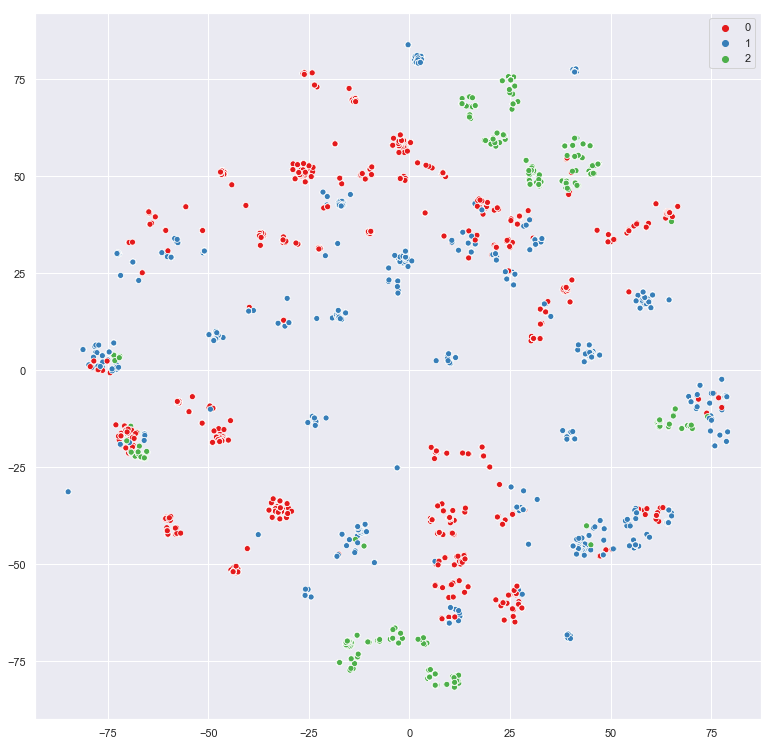

In [10]:
import seaborn as sns

sns.set(rc = {'figure.figsize' : (13, 13)})

sns.scatterplot(x = visu[:,0], y = visu[:, 1], hue = modelo.labels_, palette = sns.color_palette('Set1', 3)) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000211F9E47A58>,
      dtype=object)

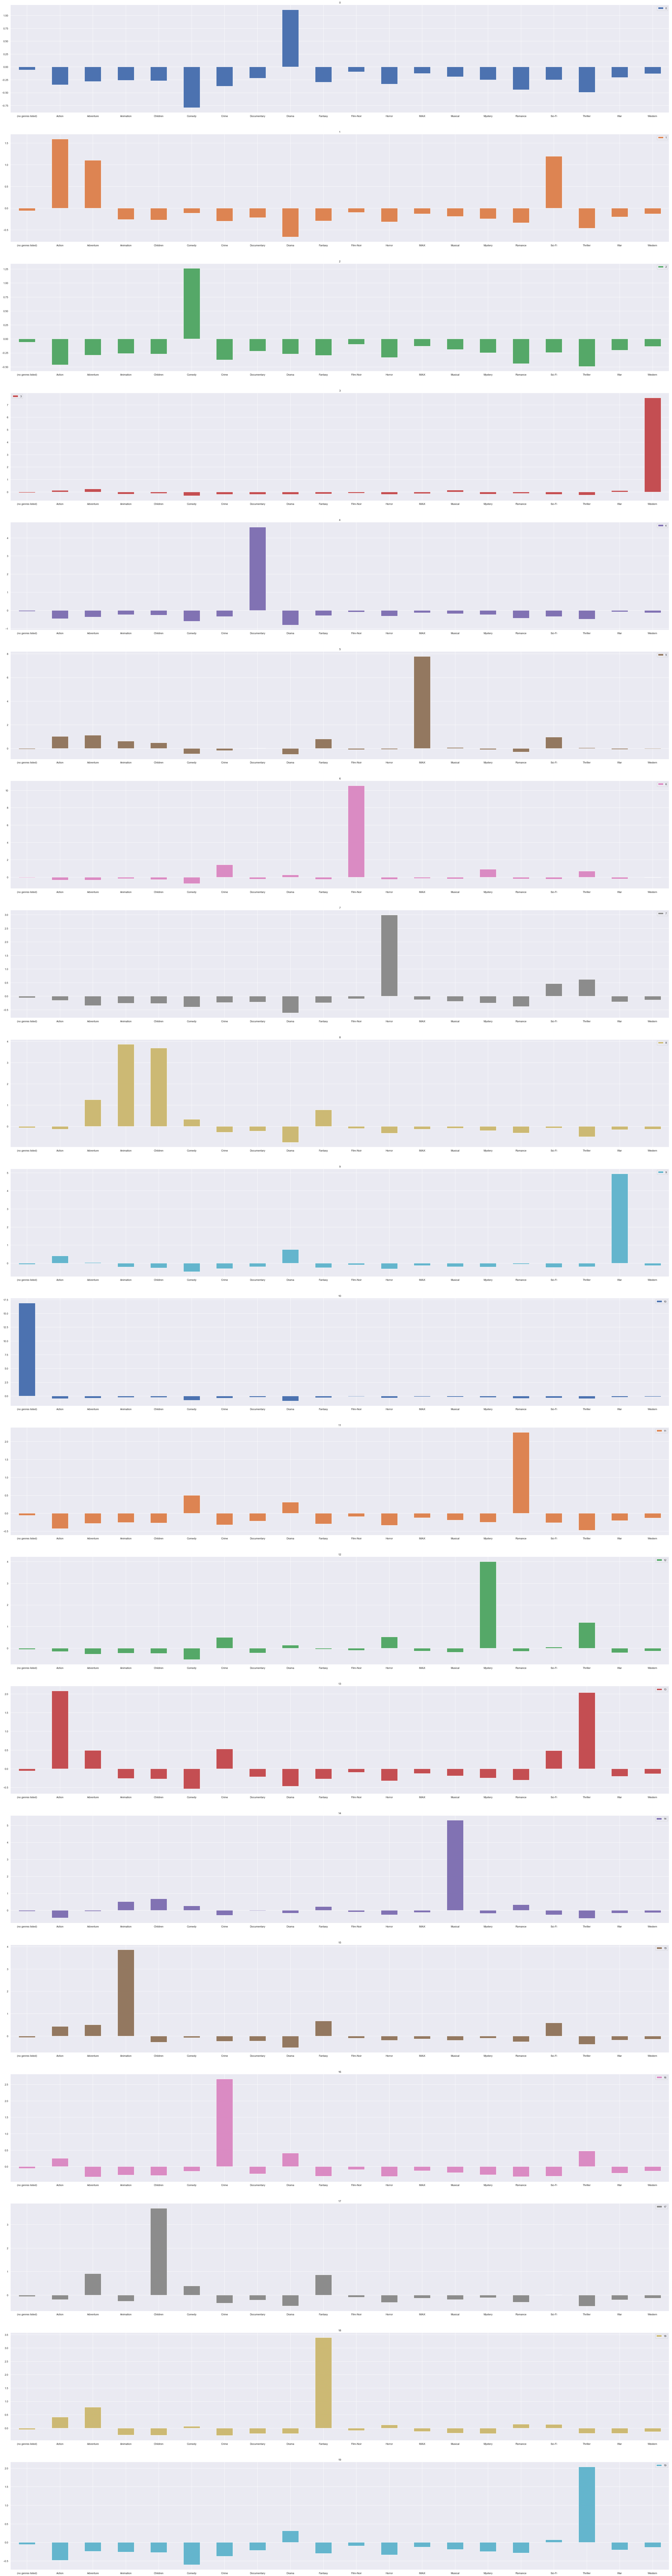

In [11]:
modelo = KMeans(n_clusters = 20)
modelo.fit(generos_escalados)
gruposs = pd.DataFrame(modelo.cluster_centers_, columns = generos.columns)
gruposs.transpose().plot.bar(subplots = True, figsize = (50, 200), sharex = False, rot = 0)

In [12]:
def kmeans(numero_de_clusters, generos):
    model = KMeans(n_clusters = numero_de_clusters)
    model.fit(generos)
    return [numero_de_clusters, model.inertia_]

In [13]:
kmeans(20, generos_escalados)

[20, 54654.72082533467]

In [14]:
result = [kmeans(numero_de_grupo, generos_escalados)for numero_de_grupo in range(1, 41)]
result

[[1, 194840.0],
 [2, 179528.16927707611],
 [3, 166397.87053417182],
 [4, 156330.42302363],
 [5, 147858.84733440742],
 [6, 137683.03823970954],
 [7, 128972.785812432],
 [8, 118969.43291911054],
 [9, 112994.28309303067],
 [10, 103052.4646868291],
 [11, 93855.34004426256],
 [12, 87070.14445084093],
 [13, 81243.3111640429],
 [14, 74546.41277555162],
 [15, 67813.11274895047],
 [16, 63730.86675353616],
 [17, 62800.67961608889],
 [18, 58240.45197738118],
 [19, 57312.85582766941],
 [20, 55224.06090497069],
 [21, 53322.12062161491],
 [22, 52299.61893892721],
 [23, 51660.68089284875],
 [24, 49665.58849684794],
 [25, 47787.628898382114],
 [26, 47140.94735814994],
 [27, 45192.66020533922],
 [28, 44659.52484024805],
 [29, 43233.43062682275],
 [30, 42326.82541418807],
 [31, 41665.33246078027],
 [32, 41673.82096245026],
 [33, 40520.22687653449],
 [34, 39772.4843726709],
 [35, 38797.638536446706],
 [36, 38071.37055266018],
 [37, 37478.632031263165],
 [38, 36510.276760254405],
 [39, 35823.887713248],
 

In [15]:
result = pd.DataFrame(result, columns = ['grupos', 'inertia'])
result

,grupos,inertia
0,1,194840.000000
1,2,179528.169277
2,3,166397.870534
3,4,156330.423024
4,5,147858.847334
5,6,137683.038240
6,7,128972.785812
7,8,118969.432919
8,9,112994.283093
9,10,103052.464687


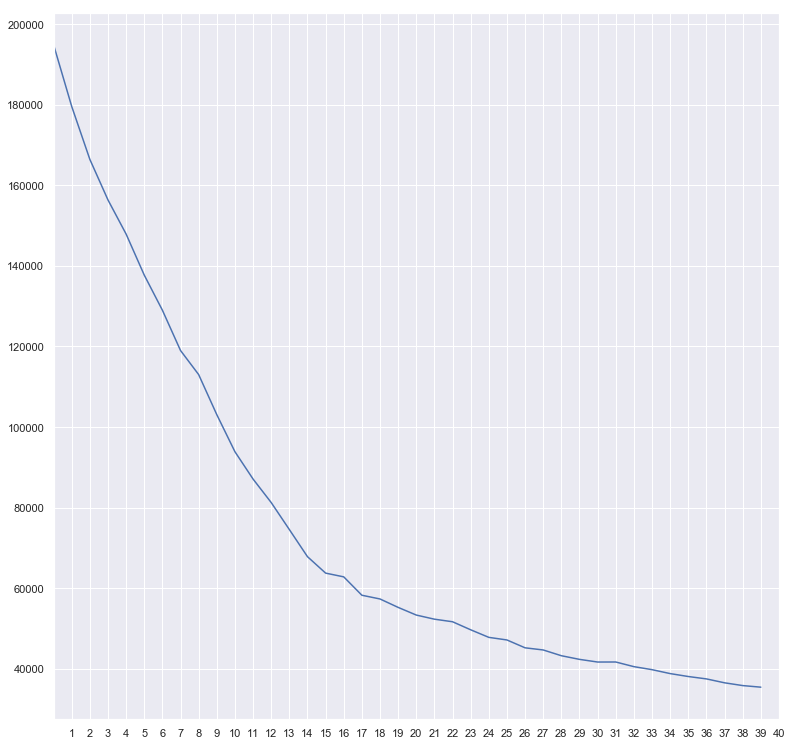

In [16]:
result.inertia.plot(xticks = result.grupos)

In [17]:
modelo = KMeans(n_clusters = 17)
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
gruposs = pd.DataFrame(modelo.cluster_centers_, columns = generos.columns)
gruposs.transpose().plot.bar(subplots = True, figsize = (250, 250), sharex = False, rot = 0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021183077D68>,
      dtype=object)

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
modelo = AgglomerativeClustering(n_clusters= 17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3], dtype=int64)

In [26]:
tsne = TSNE()
visu = tsne.fit_transform(generos_escalados)
visu

array([[ -8.923618  , -57.220123  ],
       [ -0.32542643, -25.148417  ],
       [-54.656487  ,   1.3626658 ],
       ...,
       [ 10.4177885 ,   1.8108602 ],
       [ 17.752644  , -23.925798  ],
       [-26.172895  ,  -6.478262  ]], dtype=float32)

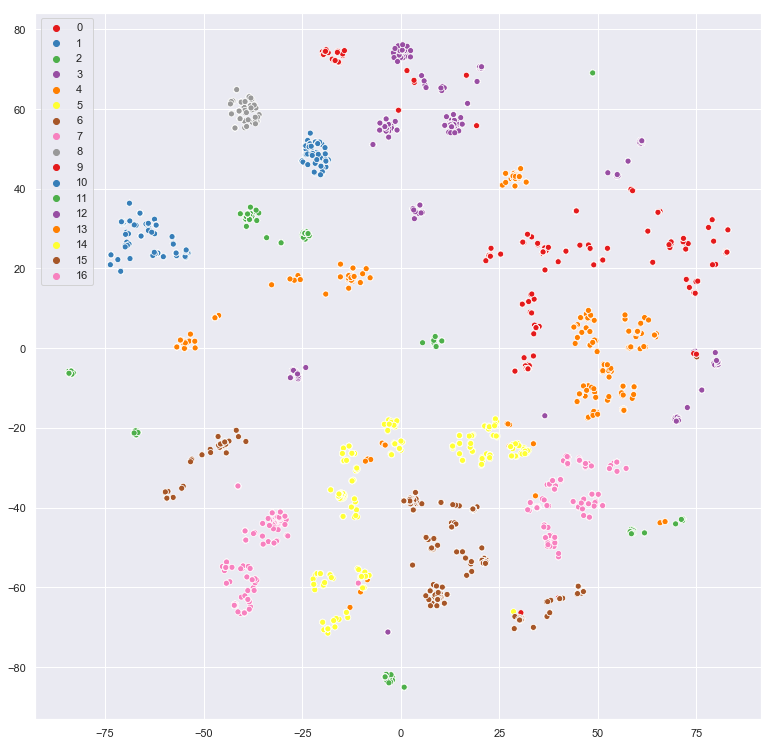

In [30]:
sns.scatterplot(x = visu[:,0], y = visu[:, 1], hue = grupos, palette = sns.color_palette('Set1', 17))

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [32]:
modelo = KMeans(n_clusters = 17)
modelo.fit(generos_escalados)
gruposs = pd.DataFrame(modelo.cluster_centers_, columns = generos.columns)
gruposs.transpose().plot.bar(subplots = True, figsize = (250, 250), sharex = False, rot = 0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002118427EA90>,
      dtype=object)

In [33]:
mat_dist = linkage(gruposs)
mat_dist

array([[ 3.        , 15.        ,  2.45491865,  2.        ],
       [ 4.        , 17.        ,  2.88497047,  3.        ],
       [ 1.        , 18.        ,  3.03609889,  4.        ],
       [12.        , 19.        ,  3.42115898,  5.        ],
       [ 9.        , 20.        ,  3.57369529,  6.        ],
       [ 2.        , 21.        ,  3.86210052,  7.        ],
       [ 0.        , 22.        ,  4.2670879 ,  8.        ],
       [13.        , 23.        ,  4.69772306,  9.        ],
       [ 6.        , 24.        ,  4.74405837, 10.        ],
       [ 5.        , 25.        ,  5.16164932, 11.        ],
       [11.        , 26.        ,  5.26999304, 12.        ],
       [16.        , 27.        ,  5.79119247, 13.        ],
       [ 7.        , 28.        ,  7.87696763, 14.        ],
       [14.        , 29.        ,  8.29088705, 15.        ],
       [10.        , 30.        , 10.815665  , 16.        ],
       [ 8.        , 31.        , 17.06708882, 17.        ]])

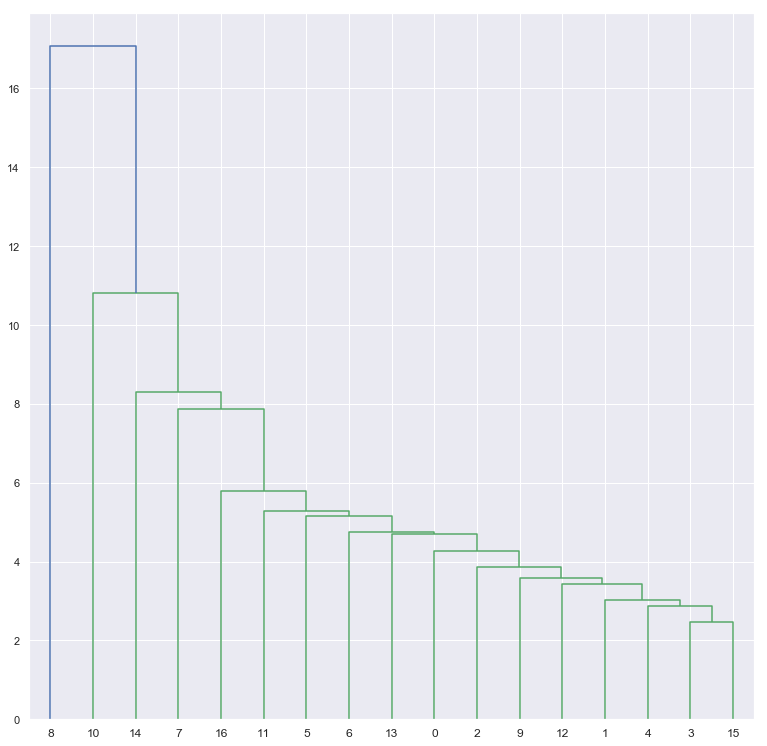

In [34]:
dendrograma = dendrogram(mat_dist)